# Activity: Perform logistic regression 

## Introduction

In this activity, you will complete an effective bionomial logistic regression. This exercise will help you better understand the value of using logistic regression to make predictions for a dependent variable based on one independent variable and help you build confidence in practicing logistic regression. Because logistic regression is leveraged across a wide array of industries, becoming proficient in this process will help you expand your skill set in a widely-applicable way.   

For this activity, you work as a consultant for an airline. The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like you to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

The data for this activity is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. Your goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data. 

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you will practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a binomial logistic regression model 
* Evaluating a binomial logistic regression model using a confusion matrix

## Step 1: Imports

### Import packages

Import relevant Python packages. Use `train_test_split`, `LogisticRegression`, and various imports from `sklearn.metrics` to build, visualize, and evalute the model.

In [1]:
### YOUR CODE HERE ###

# Standard operational package imports.
import pandas as pd
import numpy as np
import datetime as dt
import scipy

# Important imports for preprocessing, modeling, and evaluation.

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics ## confusion_matrix, accuracy_score, classification_report

## logistic regression 
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
## convenience function
def invalid_df(dataframe: pd.DataFrame):
    """
    Take a pandas df as argument, looks for the items 
    in an invalid list. returns a pd df with
    the columns: column, nulls, invalids, 
    and the unique values.
    
    Args:
        df(pd.DataFrame): a pdDataFrame.
    """
    # Running validation on the argument recieved
    assert type(dataframe) == pd.DataFrame, f'{dataframe}, is not a pandas df.'
    df = dataframe
    
    invalid_list =\
    [np.nan, None, [], {}, 'NaN', 'Null','NULL'\
     ,'None','NA','?','-', '--','.','', ' ', '   ']
    
    columnas_con_invalidos = []
    nan_or_nones = []
    invalids = []
    uniques = []
    invalid_dict = {
        'column': columnas_con_invalidos,
        'nulls': nan_or_nones,
        'invalids': invalids, 
        'unique_item': []
    }
    for c in df.columns:
        string_null = np.array([x in invalid_list[2:] for x in df[c]])
        columnas_con_invalidos.append(c)
        nan_or_nones.append((df[c].isnull().sum()))
        invalids.append(string_null.sum())
        uniques.append(df[c].unique())
        invalid_dict = {
        'columns': columnas_con_invalidos,
        'nulls': nan_or_nones,
        'invalids': invalids,
        'unique_item': uniques
        }
        
    result = pd.DataFrame(invalid_dict)
    return(result.head(len(df.columns)))

### Load the dataset

The dataset **Invistico_Airline.csv** is loaded. The resulting pandas DataFrame is saved as a variable named `df_original`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
df_original = pd.read_csv("Invistico_Airline.csv")

## New columns names
## Renaming a column
df_original.columns = df_original.columns.str.replace(' ', '')
df_original.columns = df_original.columns.str.lower()

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use a function from the pandas library to read in the csv file.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `read_csv` function and pass in the file name as a string. 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pd.read_csv("insertfilenamehere")`.

</details>

### Output the first 10 rows

Output the first 10 rows of data.

In [4]:
### YOUR CODE HERE ###
df_original.head(10)


,satisfaction,customertype,age,typeoftravel,class,flightdistance,seatcomfort,departure/arrivaltimeconvenient,foodanddrink,gatelocation,...,onlinesupport,easeofonlinebooking,on-boardservice,legroomservice,baggagehandling,checkinservice,cleanliness,onlineboarding,departuredelayinminutes,arrivaldelayinminutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `head()` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

If only five rows are output, it is because the function by default returns five rows. To change this, specify how many rows `(n = )` you want to output.

</details>

## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for a logistic regression model. This includes: 

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that logistic regression models expect numeric data. 

In [5]:
### YOUR CODE HERE ###
df = df_original.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   satisfaction                     129880 non-null  object 
 1   customertype                     129880 non-null  object 
 2   age                              129880 non-null  int64  
 3   typeoftravel                     129880 non-null  object 
 4   class                            129880 non-null  object 
 5   flightdistance                   129880 non-null  int64  
 6   seatcomfort                      129880 non-null  int64  
 7   departure/arrivaltimeconvenient  129880 non-null  int64  
 8   foodanddrink                     129880 non-null  int64  
 9   gatelocation                     129880 non-null  int64  
 10  inflightwifiservice              129880 non-null  int64  
 11  inflightentertainment            129880 non-null  int64  
 12  on

In [6]:
## Checking for missing values
## Missing values are 393
missings = df.isnull().sum().sort_values(ascending=False)
pct_missing = df['arrivaldelayinminutes'].isnull().sum() / df.isnull().count()
print(missings.head())
print()
print(f'We are missing: {round(pct_missing[0] * 100, 3)} % data in Column: `arrivaldelayinminutes`')

arrivaldelayinminutes      393
customertype                 0
departuredelayinminutes      0
onlineboarding               0
cleanliness                  0
dtype: int64

We are missing: 0.303 % data in Column: `arrivaldelayinminutes`


In [7]:
## The missing values are less than 5%
df.dropna(inplace=True)

In [8]:
## Checking for missing values
## are there any invalid string??
invalid_df(df)

,columns,nulls,invalids,unique_item
0,satisfaction,0,0,"[satisfied, dissatisfied]"
1,customertype,0,0,"[Loyal Customer, disloyal Customer]"
2,age,0,0,"[65, 47, 15, 60, 70, 30, 66, 10, 56, 22, 58, 3..."
3,typeoftravel,0,0,"[Personal Travel, Business travel]"
4,class,0,0,"[Eco, Business, Eco Plus]"
5,flightdistance,0,0,"[265, 2464, 2138, 623, 354, 1894, 227, 1812, 7..."
6,seatcomfort,0,0,"[0, 1, 4, 5, 2, 3]"
7,departure/arrivaltimeconvenient,0,0,"[0, 1, 2, 3, 4, 5]"
8,foodanddrink,0,0,"[0, 1, 2, 3, 4, 5]"
9,gatelocation,0,0,"[2, 3, 4, 1, 5, 0]"


In [9]:
## Grouping data by its types,
## for later transformation
nums_df = df.select_dtypes(['float64', 'int64'])
objs_df = df.select_dtypes(['object'])

num_cat = []
num_num = []
objs    = list(objs_df.columns)

## I will consider in this case under 10 to be a category.
for el in nums_df.columns:
    if len(df[el].unique()) < 10:
        num_cat.append(el)
    else:
        num_num.append(el)
 

## Numerical features
#num_num
# Strings categorical
#objs
## Numerical and categorical
#num_cat

In [10]:
df[objs]['satisfaction'].value_counts()

satisfied       70882
dissatisfied    58605
Name: satisfaction, dtype: int64

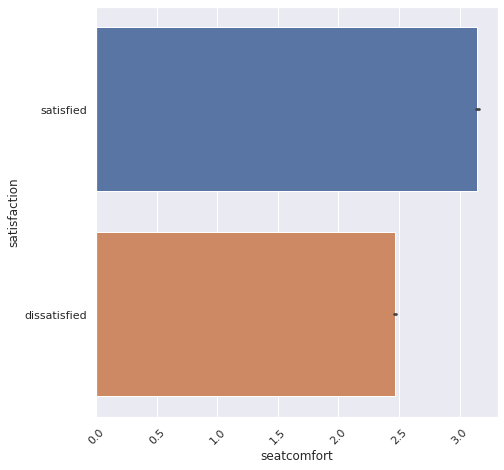

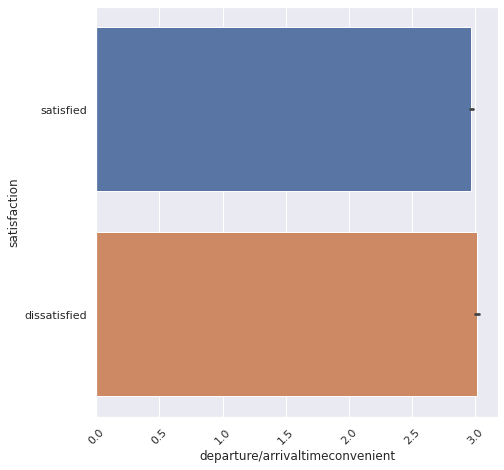

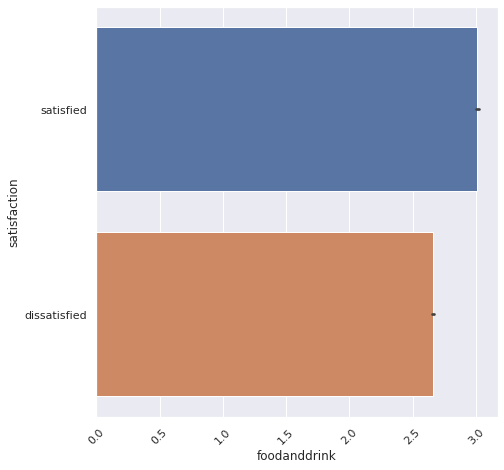

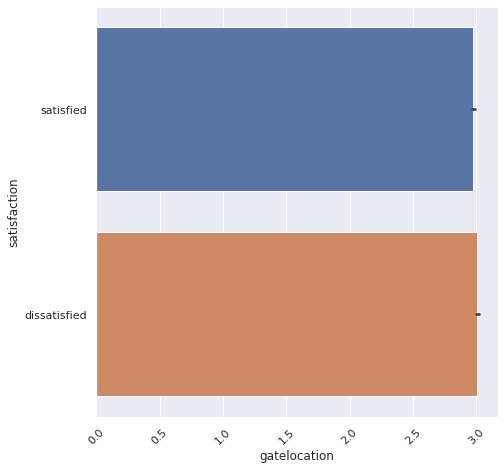

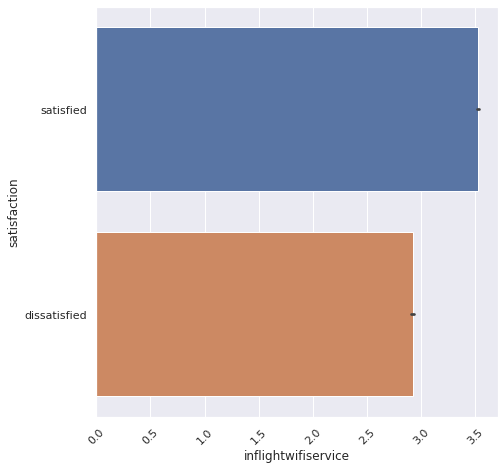

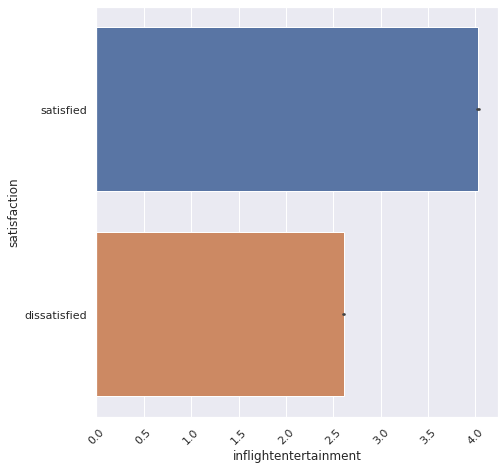

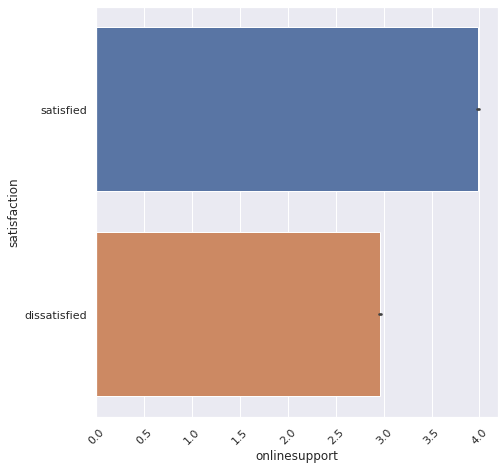

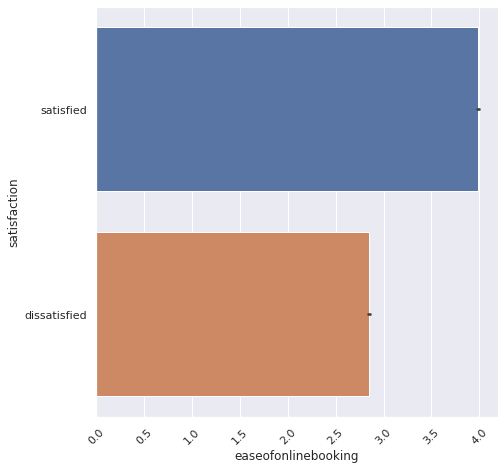

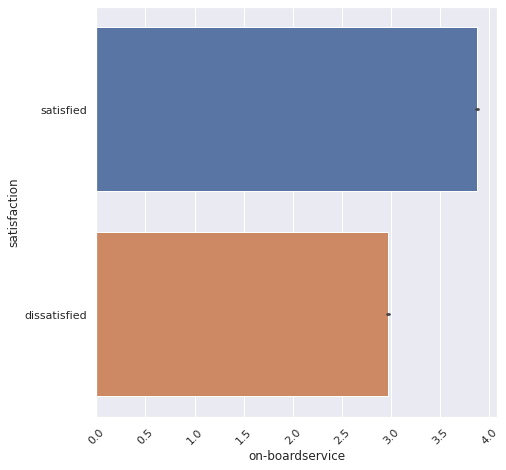

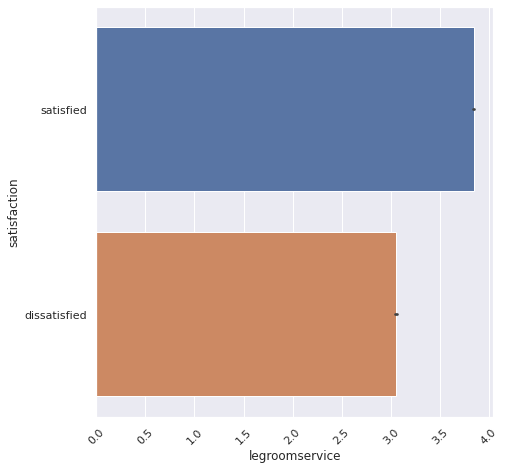

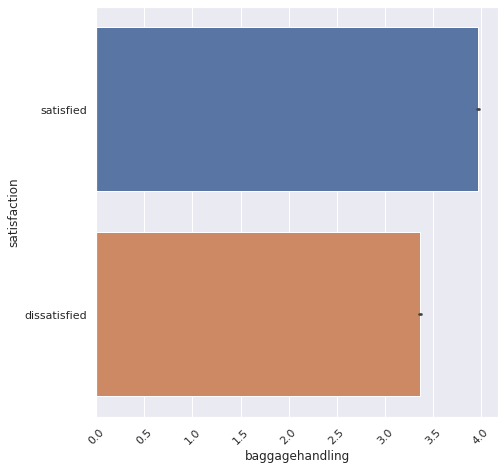

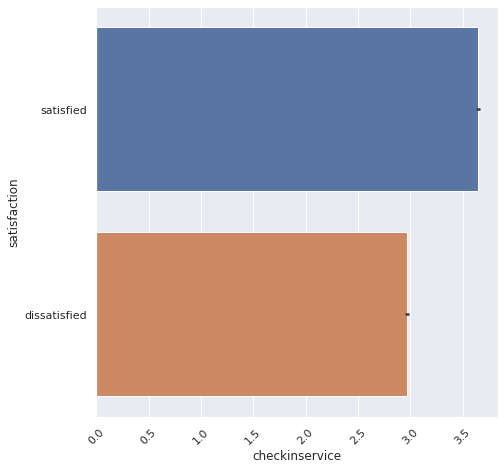

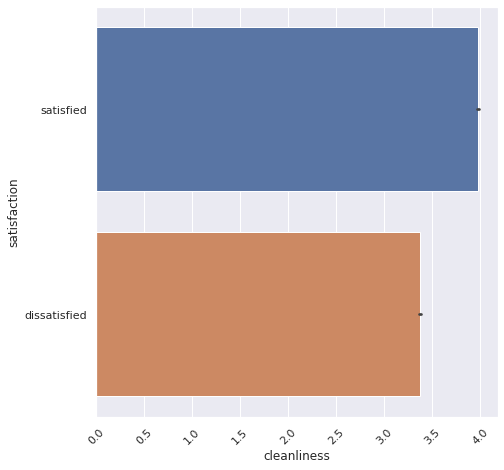

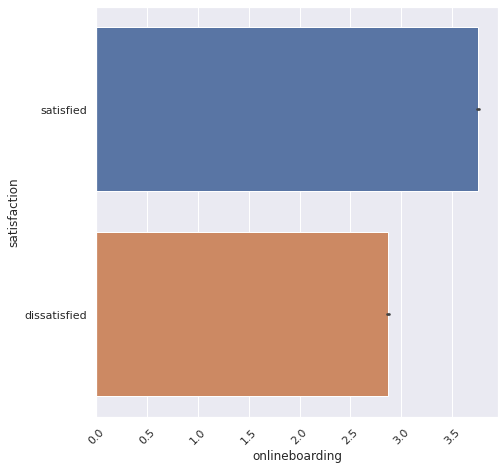

In [11]:
## More info about categorical features in this plot
for obj in num_cat[:]:
    plt.figure(figsize = (8.48,8)) #18, 8
    sns.barplot(x=obj, y='satisfaction', data=df);
    plt.xticks(rotation=45)
    plt.tight_layout(pad=5.0)
    plt.show()

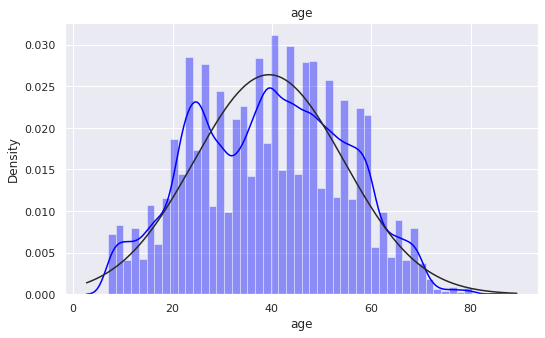

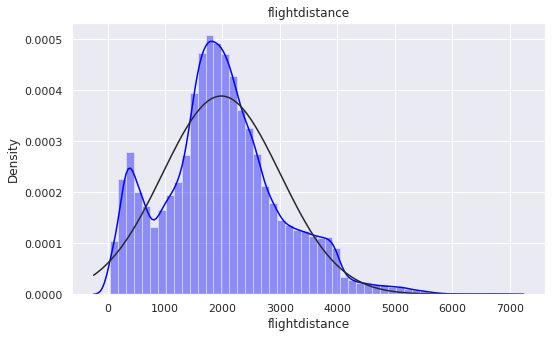

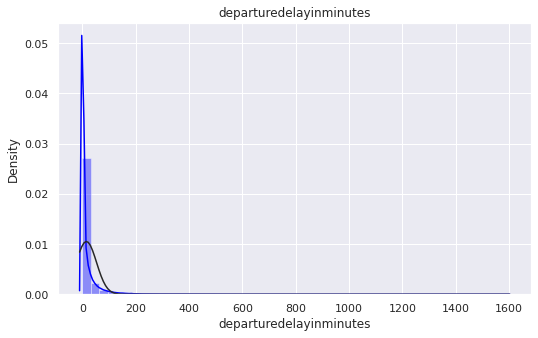

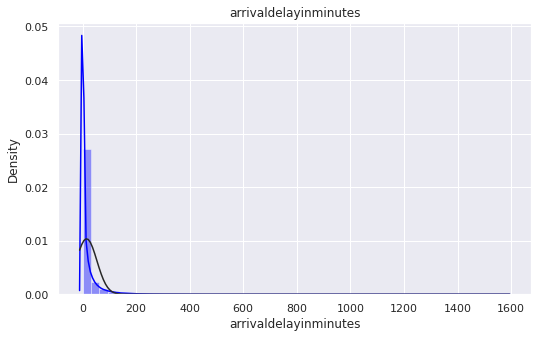

In [12]:
## Observing Distribution of the continious variables
## 
for col in num_num:
    plt.figure(figsize = (8.48,5))
    sns.distplot(df[col], kde=True, fit=scipy.stats.norm , color='Blue')
    plt.title(col)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `dtypes` attribute on the DataFrame.

</details>

### Check the number of satisfied customers in the dataset

To predict customer satisfaction, check how many customers in the dataset are satisfied before modeling.

Customers in the dataset that are satisfied: 70882
Customers in the dataset that are NOT satisfied: 58605
54.74 % Satisfied
45.26 % Un-Satisfied


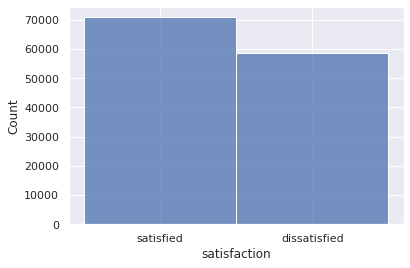

In [13]:
### YOUR CODE HERE ###
res = df['satisfaction'].value_counts()
print(f'Customers in the dataset that are satisfied: {res[0]}')
print(f'Customers in the dataset that are NOT satisfied: {res[1]}')
sns.histplot(df['satisfaction']);
pct = (res[0] / (res[0]+res[1])) * 100
un_pct = (res[1] / (res[0]+res[1])) * 100
print(f'{round(pct, 2)} % Satisfied')

print(f'{round(un_pct, 2)} % Un-Satisfied')
## 'satisfied' :0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use a function from the pandas library that returns a pandas series containing counts of unique values. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `value_counts()` function. To examine how many NaN values there are, set the `dropna` parameter passed in to this function to `False`.

</details>

**Question:** How many satisfied and dissatisfied customers were there?


**Customers in the dataset that are satisfied:** 70882

**Customers in the dataset that are NOT satisfied:** 58605

**54.74** % Satisfied

**45.26** % Un-Satisfied

**Question:** What percentage of customers were satisfied?

Customers in the dataset are satisfied: 70882
That is the: 54.74 %

### Check for missing values

An assumption of logistic regression models is that there are no missing values. Check for missing values in the rows of the data.

In [14]:
### YOUR CODE HERE ###
## I have checked already here one more time, thanks
df.isnull().sum().sort_values(ascending=False).head()


satisfaction               0
customertype               0
departuredelayinminutes    0
onlineboarding             0
cleanliness                0
dtype: int64

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

To get the number of rows in the data with missing values, use the `isnull` function followed by the `sum` function.

</details>

**Question:** Should you remove rows where the `Arrival Delay in Minutes` column has missing values, even though the airline is more interested in the `inflight entertainment` column?

the missing values were less than 5% so I drop them.

### Drop the rows with missing values

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

In [15]:
### YOUR CODE HERE ###
df_subset = df.copy()

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `dropna` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Set the axis parameter passed into the `dropna` function to `0` if you want to drop rows containing missing values, or `1` if you want to drop columns containing missing values. Optionally, use reset_index to avoid a SettingWithCopy warning later in the notebook. 

</details>

### Prepare the data

If you want to create a plot (`sns.regplot`) of your model to visualize results later in the notebook, the independent variable `Inflight entertainment` cannot be "of type int" and the dependent variable `satisfaction` cannot be "of type object." 

Make the `Inflight entertainment` column "of type float." 

In [16]:
### YOUR CODE HERE ###
df_subset['inflightentertainment'] = df_subset['inflightentertainment'].astype(float)
print(df_subset['inflightentertainment'].unique())

[4. 2. 0. 3. 5. 1.]


<details>
    
  <summary><h4><strong>Hint 1</strong></h4></summary>
Use the `.astype()` function with the dictionary `{"Inflight entertainment": float}` as an input.

</details>

### Convert the categorical column `satisfaction` into numeric

Convert the categorical column `satisfaction` into numeric through one-hot encoding.

In [17]:
OneHotEncoder(drop='first').fit_transform(df_subset[['satisfaction']])

<129487x1 sparse matrix of type '<class 'numpy.float64'>'
	with 70882 stored elements in Compressed Sparse Row format>

In [18]:
OneHotEncoder(drop='first').fit_transform(df_subset[['satisfaction']]).toarray()

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [19]:
OneHotEncoder().fit_transform(df_subset[['satisfaction']]).toarray()

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [20]:
### YOUR CODE HERE ###
df_subset['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df_subset[['satisfaction']]).toarray()

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `OneHotEncoder()` from `sklearn.preprocessing`.
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Call `OneHotEncoder()`, specifying the `drop` argument as `'first'` in order to remove redundant columns from the output. 

Call `.fit_transform()`, passing in the subset of the data that you want to encode (the subset consisting of `satisfaction`). 

Call `.toarray()` in order to convert the sparse matrix that `.fit_transform()` returns into an array.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Index `df_subset` with a double pair of square brackets to get a DataFrame that consists of just `satisfaction`.

After getting the encoded values, update the `satisfaction` column (you can use reassignment).

</details>

### Output the first 10 rows of `df_subset`

To examine what one-hot encoding did to the DataFrame, output the first 10 rows of `df_subset`.

In [21]:
### YOUR CODE HERE ###
df_subset.head(10)

,satisfaction,customertype,age,typeoftravel,class,flightdistance,seatcomfort,departure/arrivaltimeconvenient,foodanddrink,gatelocation,...,onlinesupport,easeofonlinebooking,on-boardservice,legroomservice,baggagehandling,checkinservice,cleanliness,onlineboarding,departuredelayinminutes,arrivaldelayinminutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,1.0,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,1.0,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,1.0,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,1.0,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,1.0,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `head()` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

If only five rows are outputted, it is because the function by default returns five rows. To change this, specify how many rows `(n = )` you want.

</details>

### Create the training and testing data

Put 70% of the data into a training set and the remaining 30% into a testing set. Create an X and y DataFrame with only the necessary variables.


In [22]:
### YOUR CODE HERE ###

X = df_subset[['inflightentertainment']]
y = df_subset['satisfaction']

X = sm.add_constant(X)

## one
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(90640, 2) (38847, 2) (90640,) (38847,)


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `train_test_split`.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

If you named your independent variable `X` and your dependent variable `y`, then it would be `train_test_split(X, y, test_size=0.30, random_state=42)`.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

When you use `train_test_split`, pass in `42` to `random_state`. `random_state` is used so that if other data professionals run this code, they can get the same exact train test split. If you use a different random state, your results will differ. </details>

**Question:** If you want to consider customer satisfaction with your model, should you train your model to use `inflight entertainment` as your sole independent variable? 

I dont think `inflight entertainment` could explain the whole picture when thinking customer satisfaction. Perhapsa some.

## Step 3: Model building

### Fit a LogisticRegression model to the data

Build a logistic regression model and fit the model to the training data. 

In [23]:
### YOUR CODE HERE ###
clf1 = sm.Logit(y_train, X_train).fit()


Optimization terminated successfully.
         Current function value: 0.535722
         Iterations 6


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `LogisticRegression()` and the `fit()` function on the training set. `LogisticRegression().fit(X_train,y_train)`.

</details>

### Obtain parameter estimates
Make sure you output the two parameters from your model. 

In [25]:
### YOUR CODE HERE ###

clf1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                90640
Model:                          Logit   Df Residuals:                    90638
Method:                           MLE   Df Model:                            1
Date:                Fri, 30 Jun 2023   Pseudo R-squ.:                  0.2219
Time:                        02:36:59   Log-Likelihood:                -48558.
converged:                       True   LL-Null:                       -62408.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.1937      0.026   -122.380      0.000      -3.245      -3.143
inflightentertainment     0.9976      0.007    138.296      0.000       0.983       1.012
=========================================================================================
"""

In [28]:
### YOUR CODE HERE ###

y_pred = clf1.predict(X_test)
prediction = list(map(round, y_pred))
params1 = clf1.params
##

print(params1)


const                   -3.193728
inflightentertainment    0.997565
dtype: float64


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the content on [obtaining the parameter estimates](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/XCLzq/construct-a-logistic-regression-model-with-python) from a logistic regression model.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Call attributes to obtain the coefficient and intercept estimates.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `.coef_` and `.intercept_`

</details>

### Create a plot of your model

Create a plot of your model to visualize results using the seaborn package.

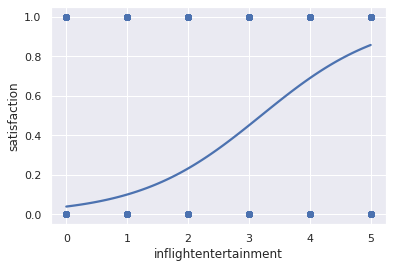

In [33]:
### YOUR CODE HERE ###
sns.regplot(X['inflightentertainment'], y, data=df_subset, logistic=True, ci=None);

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use a function from the seaborn library that can plot data and a logistic regression model fit.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `regplot` function.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Set the `logistic` parameter passed in to this function to `True` to estimate a logistic regression model.

</details>

**Question:** What can you tell from the graph?

[Write your response here. Double-click (or enter) to edit.]

## Step 4. Results and evaluation


### Predict the outcome for the test dataset

Now that you've completed your regression, review and analyze your results. First, input the holdout dataset into the `predict` function to get the predicted labels from the model. Save these predictions as a variable called `y_pred`.

In [ ]:
### YOUR CODE HERE ###

# Save predictions.
y_pred = clf1.predict(X_test)
prediction = list(map(round, y_pred))

### Print out `y_pred`

In order to examine the predictions, print out `y_pred`. 

In [35]:
### YOUR CODE HERE ###
print(prediction)

[1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 

### Use the `predict_proba` and `predict` functions on `X_test`

In [36]:
# Use predict_proba to output a probability.

### YOUR CODE HERE ###
print(y_pred)

98180     0.857429
24974     0.449910
69242     0.100096
90488     0.689232
36205     0.689232
            ...   
77048     0.689232
61549     0.857429
5330      0.100096
48164     0.231725
102610    0.449910
Length: 38847, dtype: float64


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Using the `predict_proba` function on `X_test` will produce the probability that each observation is a 0 or 1. 

</details>

In [42]:
# Use predict to output 0's and 1's.

### YOUR CODE HERE ###
list(map(round, clf1.predict(X_test)))

[1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,


<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

`clf.predict` outputs an array of 0's and 1's, where 0's are satisfied and 1's are not satisfied. 

</details>

### Analyze the results

Print out the model's accuracy, precision, recall, and F1 score.

In [50]:
### YOUR CODE HERE ###
acc = metrics.accuracy_score(y_test, prediction)
pre = metrics.precision_score(y_test, prediction)
rec = metrics.recall_score(y_test, prediction)
f_1 = metrics.f1_score(y_test, prediction)

print(f'Accuracy:  {round(acc, 6)}')
print(f'Precision: {round(pre, 6)}')
print(f'Recall:    {round(rec, 6)}')
print(f'F1:        {round(f_1, 6)}')

Accuracy:  0.801529
Precision: 0.816142
Recall:    0.82153
F1:        0.818827


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use four different functions from `metrics` to get the accuracy, precision, recall, and F1 score.
    
</details>  

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Input `y_test` and `y_pred` into the `metrics.accuracy_score`, `metrics.precision_score`, `metrics.recall_score`, and `metrics.f1_score` functions. 
    
</details> 

### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

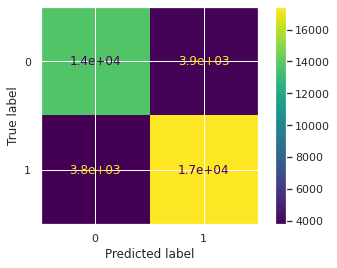

In [62]:
### YOUR CODE HERE ###
cm = metrics.confusion_matrix(y_test, prediction)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['0','1'])

disp.plot();

**Question:** What stands out to you about the confusion matrix?

both miss classifications are under 4000 each. not bad having in mind the total amount.

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about plotting a confusion matrix](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/SpRqe/evaluate-a-binomial-logistic-regression-model).

</details>

**Question:** Did you notice any difference in the number of false positives or false negatives that the model produced?

There isn't a large difference in the number of false positives and false negatives. 

**Question:** What do you think could be done to improve model performance?

Using more than a single independent variable in the model training process could improve model performance. This is because other variables, like Departure Delay in Minutes, seem like they could potentially influence customer satisfaction.

## Considerations

**What are some key takeaways that you learned from this lab?**
*   A lot of machine learning workflows are about cleaning, encoding, and scaling data.
*   The approach you use to plot or graph your data may depend on the type of variable you are evaluating. 
*   Training a logistic regression model on a single independent variable can produce a relatively good model (80.2 percent accuracy).

**What findings would you share with others?**
*   Logistic regression accurately predicted satisfaction 80.2 percent of the time.  
*   The confusion matrix is useful, as it displays a similar amount of true positives and true negatives. 

**What would you recommend to stakeholders?**
*  Customers who rated in-flight entertainment highly were more likely to be satisfied. Improving in-flight entertainment should lead to better customer satisfaction. 
*  The model is 80.2 percent accurate. This is an improvement over the dataset's customer satisfaction rate of 54.7 percent. 
*  The success of the model suggests that the airline should invest more in model developement to examine if adding more independent variables leads to better results. Building this model could not only be useful in predicting whether or not a customer would be satisfied but also lead to a better understanding of what independent variables lead to happier customers. 